# Medidas de tendência central

Este _notebook_ faz parte da análise das expectativas de vida nos diferentes distritos do município de São Paulo. 

**Objetivos** 

Verificar qual a moda, a mediana e a média das idades das pessoas no seu falecimento nos diferentes distritos de São Paulo.

**Você vai aprender:**
* O que é e como se calcula a [moda](#moda) de uma distribuição.
* O que é e como se calcula a [mediana](#mediana) de uma distribuição.
* O que é e como se calcula a [média](#media) de uma distribuição.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

## 1. Da distribuição para um número representativo

Para conhecer mais sobre o conceito de distribuição, veja esta [seção do tutorial](10_analise_exp-vida_distritos_municipio-SP.ipynb#distribuicao).

In [6]:
# Carregando os dados:
obitos_por_distrito_df = pd.read_csv('dados/limpos/obitos-resid_por_idade_distrito-resid_2010-2019_limpo.csv')

In [33]:
obitos_por_distrito_df.columns

Index(['Idade Detalhada', 'Água Rasa', 'Alto de Pinheiros', 'Anhanguera',
       'Aricanduva', 'Artur Alvim', 'Barra Funda', 'Bela Vista', 'Belém',
       'Bom Retiro', 'Brás', 'Brasilândia', 'Butantã', 'Cachoeirinha',
       'Cambuci', 'Campo Belo', 'Campo Grande', 'Campo Limpo', 'Cangaíba',
       'Capão Redondo', 'Carrão', 'Casa Verde', 'Cidade Ademar',
       'Cidade Dutra', 'Cidade Líder', 'Cidade Tiradentes', 'Consolação',
       'Cursino', 'Ermelino Matarazzo', 'Freguesia do Ó', 'Grajaú',
       'Guaianases', 'Iguatemi', 'Ipiranga', 'Itaim Bibi', 'Itaim Paulista',
       'Itaquera', 'Jabaquara', 'Jaçanã', 'Jaguara', 'Jaguaré', 'Jaraguá',
       'Jardim Ângela', 'Jardim Helena', 'Jardim Paulista', 'Jardim São Luís',
       'José Bonifácio', 'Lajeado', 'Lapa', 'Liberdade', 'Limão', 'Mandaqui',
       'Marsilac', 'Moema', 'Moóca', 'Morumbi', 'Parelheiros', 'Pari',
       'Parque do Carmo', 'Pedreira', 'Penha', 'Perdizes', 'Perus',
       'Pinheiros', 'Pirituba', 'Ponte Rasa', 'Rapo

In [17]:
obitos_por_distrito_df['Água Rasa'].sum()

8647

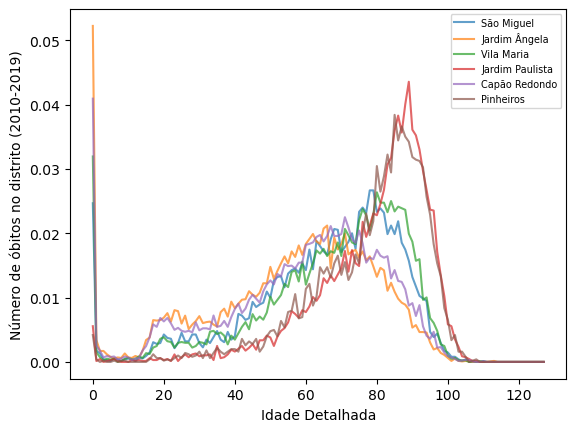

In [34]:
# Comparando a distribuição dos óbitos por idade, para diferentes distritos:
distritos_selecionados = ['São Miguel','Jardim Ângela','Vila Maria', 'Jardim Paulista','Capão Redondo','Pinheiros']
for distrito in distritos_selecionados:
    (obitos_por_distrito_df.set_index('Idade Detalhada')[distrito]/obitos_por_distrito_df[distrito].sum()).plot(label=distrito, alpha=0.7)
pl.ylabel('Número de óbitos no distrito (2010-2019)')
pl.legend(loc='upper right',fontsize='x-small')
pl.show()

<a id="moda"></a>
### 1.1. Moda

A moda nada mais é do que o valor mais repetido em uma população. No nosso exemplo, é a idade em que ocorrem mais óbitos. 

In [47]:
#Idade (índice) com maior número de mortes em cada bairro/distrito
idade_moda=obitos_por_distrito_df.loc[:, distritos_selecionados ].idxmax()

#Número de mortes de pessoas com as respectivas idades anteriores nos respectivos bairros/distritos
qtd_obitos_moda= obitos_por_distrito_df.loc[:, distritos_selecionados ].max()

tabela_moda=pd.DataFrame({'idade_moda':idade_moda,'qtd_obitos':qtd_obitos_moda,'qtd_obitos':qtd_obitos_moda},index=distritos_selecionados )

tabela_moda

,idade_moda,qtd_obitos
São Miguel,78,200
Jardim Ângela,0,675
Vila Maria,0,258
Jardim Paulista,89,298
Capão Redondo,0,533
Pinheiros,85,193


<a id="mediana"></a>
### 1.2. Mediana

Mediana é definida como o valor que divide sua população ao meio, no nosso exemplo, o valor que é maior do que a idade de óbito de 50% da população. 

Para calculá-la, temos que utilizar a função median, considerando o número de indivíduos para cada idade de óbito. Para isso criaremos um arrary com as idades de óbito repetidas na mesma quantidade de indivíduos.

In [90]:
array_obitos = obitos_por_distrito_df['Jardim Ângela'].to_numpy()
individuos = []
c = 0
for i in obitos_por_distrito_df['Jardim Ângela']:
    for j in range(0, array_obitos[c]):
        individuos.append(c)
    c += 1
    
print(np.median(a = individuos))

60.0


Podemos criar uma tabela para as regiões selecionadas

In [93]:
mediana=[]
for distrito in distritos_selecionados:
    array_obitos = obitos_por_distrito_df[distrito].to_numpy()
    individuos = []
    c = 0
    for i in obitos_por_distrito_df[distrito]:
        for j in range(0, array_obitos[c]):
            individuos.append(c)
        c += 1
    
    mediana.append(np.median(a = individuos))


In [92]:
medianas_distritos=pd.DataFrame({'distrito':distritos_selecionados,'mediana':mediana})
medianas_distritos

,distrito,mediana
0,São Miguel,69.0
1,Jardim Ângela,60.0
2,Vila Maria,72.0
3,Jardim Paulista,83.0
4,Capão Redondo,63.0
5,Pinheiros,82.0


In [79]:
mediana =pd.DataFrame({'mediana':np.median(obitos_por_distrito_df[distritos_selecionados[0]])},index=[distritos_selecionados[0]])

for distrito in distritos_selecionados[1:]:
    mediana=pd.concat([mediana,pd.DataFrame({'mediana':np.median(obitos_por_distrito_df[distrito])},index=[distrito])])

mediana

,mediana
São Miguel,33.5
Jardim Ângela,91.5
Vila Maria,37.5
Jardim Paulista,17.0
Capão Redondo,82.5
Pinheiros,13.5


<a id="media"></a>
### 1.3. Média

$\bar{I} = \frac{1}{N} \left( I_1 + I_2 + \ldots +  I_N \right)= \frac{1}{N} \sum_{j=1}^N I_j$

In [110]:
print(np.average(a=obitos_por_distrito_df['Idade Detalhada'], weights=obitos_por_distrito_df['Jardim Ângela']))
print(np.average(a=obitos_por_distrito_df['Idade Detalhada'], weights=obitos_por_distrito_df['Jardim Paulista']))

#Idade média das mortes em Jardim Ângela e em Jardim Paulista

55.486720867208675
78.93594618309447
